In [1]:
import numpy as np
import pandas as pd
import pyarrow as pa
import pyarrow.parquet as pq
#Import package matplotlib for visualisation/plotting
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.tree import export_graphviz
import xgboost as xgb
from xgboost import XGBRegressor
import time

# Review, prepare and split the dataset into two datasets: 70% training and 30% test

In [2]:

# read in the cleaned csv

df = pd.read_csv('train_data_2.3.csv')

df

,taxi_zone,datetime,passenger_count,year_month,week,hour,borough,entertainment_and_recreation,financial_services,food_and_beverage,parking_and_automotive_services,professional_services,real_estate,retail_services,transportation,hospital,hotspots,school,total_business,holiday
0,1,2022-01-01 00:00:00,0,2022-01,5,0,EWR,0,0,0,0,0,0,0,0,0,0,0,0,New Year's Day
1,1,2022-01-01 01:00:00,0,2022-01,5,1,EWR,0,0,0,0,0,0,0,0,0,0,0,0,New Year's Day
2,1,2022-01-01 02:00:00,2,2022-01,5,2,EWR,0,0,0,0,0,0,0,0,0,0,0,0,New Year's Day
3,1,2022-01-01 03:00:00,1,2022-01,5,3,EWR,0,0,0,0,0,0,0,0,0,0,0,0,New Year's Day
4,1,2022-01-01 04:00:00,8,2022-01,5,4,EWR,0,0,0,0,0,0,0,0,0,0,0,0,New Year's Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3038035,263,2023-04-30 19:00:00,247,2023-04,6,19,Manhattan,69,0,0,37,11,116,108,4,0,14,4,363,No
3038036,263,2023-04-30 20:00:00,242,2023-04,6,20,Manhattan,69,0,0,37,11,116,108,4,0,14,4,363,No
3038037,263,2023-04-30 21:00:00,210,2023-04,6,21,Manhattan,69,0,0,37,11,116,108,4,0,14,4,363,No
3038038,263,2023-04-30 22:00:00,152,2023-04,6,22,Manhattan,69,0,0,37,11,116,108,4,0,14,4,363,No


# drop low correlation features

In [3]:
df = df.drop(['datetime', 'entertainment_and_recreation', 'financial_services', 'food_and_beverage', 'parking_and_automotive_services', 'professional_services', 'real_estate', 'retail_services', 'transportation', 'hospital', 'school', 'total_business'], axis=1)
df

,taxi_zone,passenger_count,year_month,week,hour,borough,hotspots,holiday
0,1,0,2022-01,5,0,EWR,0,New Year's Day
1,1,0,2022-01,5,1,EWR,0,New Year's Day
2,1,2,2022-01,5,2,EWR,0,New Year's Day
3,1,1,2022-01,5,3,EWR,0,New Year's Day
4,1,8,2022-01,5,4,EWR,0,New Year's Day
...,...,...,...,...,...,...,...,...
3038035,263,247,2023-04,6,19,Manhattan,14,No
3038036,263,242,2023-04,6,20,Manhattan,14,No
3038037,263,210,2023-04,6,21,Manhattan,14,No
3038038,263,152,2023-04,6,22,Manhattan,14,No


In [4]:
df.dtypes

taxi_zone           int64
passenger_count     int64
year_month         object
week                int64
hour                int64
borough            object
hotspots            int64
holiday            object
dtype: object

In [5]:
df['taxi_zone'] = df['taxi_zone'].astype('category')
df['year_month'] = df['year_month'].astype('category')
df['week'] = df['week'].astype('category')
df['hour'] = df['hour'].astype('category')
df['borough'] = df['borough'].astype('category')
# df['holiday'] = df['holiday'].astype('category')
df.dtypes

taxi_zone          category
passenger_count       int64
year_month         category
week               category
hour               category
borough            category
hotspots              int64
holiday              object
dtype: object

# set up dummies features

In [6]:
# set up dummies features
df = pd.get_dummies(df)
df.dtypes

passenger_count                      int64
hotspots                             int64
taxi_zone_1                          uint8
taxi_zone_2                          uint8
taxi_zone_3                          uint8
                                     ...  
holiday_New Year's Day (Observed)    uint8
holiday_No                           uint8
holiday_Thanksgiving                 uint8
holiday_Veterans Day                 uint8
holiday_Washington's Birthday        uint8
Length: 329, dtype: object

In [7]:
for col in df.columns:
    print(col)

passenger_count
hotspots
taxi_zone_1
taxi_zone_2
taxi_zone_3
taxi_zone_4
taxi_zone_5
taxi_zone_6
taxi_zone_7
taxi_zone_8
taxi_zone_9
taxi_zone_10
taxi_zone_11
taxi_zone_12
taxi_zone_13
taxi_zone_14
taxi_zone_15
taxi_zone_16
taxi_zone_17
taxi_zone_18
taxi_zone_19
taxi_zone_20
taxi_zone_21
taxi_zone_22
taxi_zone_23
taxi_zone_24
taxi_zone_25
taxi_zone_26
taxi_zone_27
taxi_zone_28
taxi_zone_29
taxi_zone_30
taxi_zone_31
taxi_zone_32
taxi_zone_33
taxi_zone_34
taxi_zone_35
taxi_zone_36
taxi_zone_37
taxi_zone_38
taxi_zone_39
taxi_zone_40
taxi_zone_41
taxi_zone_42
taxi_zone_43
taxi_zone_44
taxi_zone_45
taxi_zone_46
taxi_zone_47
taxi_zone_48
taxi_zone_49
taxi_zone_50
taxi_zone_51
taxi_zone_52
taxi_zone_53
taxi_zone_54
taxi_zone_55
taxi_zone_56
taxi_zone_57
taxi_zone_58
taxi_zone_59
taxi_zone_60
taxi_zone_61
taxi_zone_62
taxi_zone_63
taxi_zone_64
taxi_zone_65
taxi_zone_66
taxi_zone_67
taxi_zone_68
taxi_zone_69
taxi_zone_70
taxi_zone_71
taxi_zone_72
taxi_zone_73
taxi_zone_74
taxi_zone_75
taxi_zone

# Shuffle and split the dataset into two datasets: 70% training and 30% test

In [8]:
# shuffle the data
df = df.sample(frac=1, random_state=987)
print(df.head(5))

         passenger_count  hotspots  taxi_zone_1  taxi_zone_2  taxi_zone_3  \
228483                 0         1            0            0            0   
208468                 2        23            0            0            0   
2144853                3         1            0            0            0   
174233                 0         2            0            0            0   
1564157               13        30            0            0            0   

         taxi_zone_4  taxi_zone_5  taxi_zone_6  taxi_zone_7  taxi_zone_8  ...  \
228483             0            0            0            0            0  ...   
208468             0            0            0            0            0  ...   
2144853            0            0            0            0            0  ...   
174233             0            0            0            0            0  ...   
1564157            0            0            0            0            0  ...   

         holiday_Independence Day  holiday_Labor D

In [9]:
# split data set to training data and test data
y = pd.DataFrame(df["passenger_count"])
X = df.drop(labels=["passenger_count"], axis=1)

# divide data into training data and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=93)

In [10]:
# need to reset the index to allow contatenation with predicted values otherwise not joining on same index...
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
X_train.head(5)

,hotspots,taxi_zone_1,taxi_zone_2,taxi_zone_3,taxi_zone_4,taxi_zone_5,taxi_zone_6,taxi_zone_7,taxi_zone_8,taxi_zone_9,...,holiday_Independence Day,holiday_Labor Day,holiday_Martin Luther King Jr. Day,holiday_Memorial Day,holiday_New Year's Day,holiday_New Year's Day (Observed),holiday_No,holiday_Thanksgiving,holiday_Veterans Day,holiday_Washington's Birthday
0,63,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,29,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


# use XGboost regression

# instantiate the model

In [11]:
# record the start time
start_time = time.time()

# instantiate the model
xgb = XGBRegressor(n_estimators=100, max_depth=10, learning_rate=0.1, random_state=1)



# fit the model
xgb.fit(X_train, y_train)

# calculate and print the time taken
time_taken = time.time() - start_time
print(f"Time taken to fit the model: {time_taken} seconds")

Time taken to fit the model: 1699.4049530029297 seconds


# Print the predicted target feature value¶

In [12]:
# Predicted value for all examples, 
# using the trained model, on in-sample data (same sample used for training and test)
xgb_predictions_train = xgb.predict(X_train).ravel()
y_train_1d = y_train.values.ravel()

df_true_vs_xgb_predicted = pd.DataFrame({'Actual': y_train_1d, 'Predicted': xgb_predictions_train})
df_true_vs_xgb_predicted.head(100)


,Actual,Predicted
0,19,44.549244
1,4,7.771207
2,0,1.386371
3,155,220.880341
4,0,0.815005
...,...,...
95,3,7.854536
96,2,1.872770
97,21,13.070092
98,0,0.978024


In [13]:
# Calculate MAE, MSE and RMSE
mae = metrics.mean_absolute_error(df_true_vs_xgb_predicted['Actual'], df_true_vs_xgb_predicted['Predicted'])
mse = metrics.mean_squared_error(df_true_vs_xgb_predicted['Actual'], df_true_vs_xgb_predicted['Predicted'])
rmse = np.sqrt(mse) # or mse**(0.5)  

print('Mean Absolute Error (MAE):', mae)
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)

Mean Absolute Error (MAE): 12.498460373610314
Mean Squared Error (MSE): 1067.6788695040984
Root Mean Squared Error (RMSE): 32.675355690552145


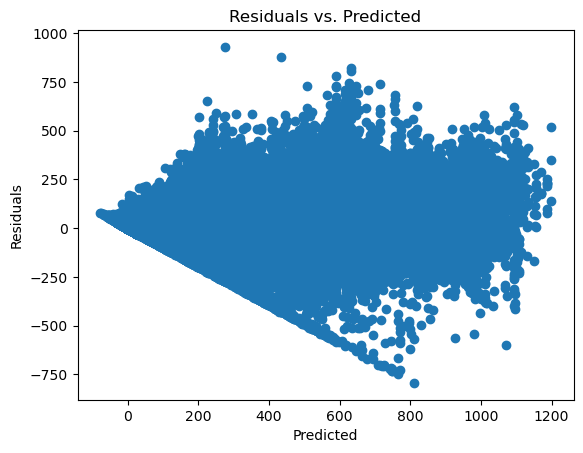

In [14]:
# Convert to DataFrame
y_train_df = pd.DataFrame(y_train).reset_index(drop=True)
xgb_predictions_train_df = pd.DataFrame(xgb_predictions_train, columns=['Predicted']).reset_index(drop=True)

# Calculate residuals
residuals = y_train_df['passenger_count'] - xgb_predictions_train_df['Predicted']

# Plot residuals
plt.scatter(xgb_predictions_train_df, residuals)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted')
plt.show()


In [15]:
# plt.hist(residuals, bins=20)
# plt.xlabel('Residuals')
# plt.ylabel('Frequency')
# plt.title('Distribution of Residuals')
# plt.show()

In [16]:
print(len(y_train))
print(len(xgb_predictions_train))


2126628
2126628


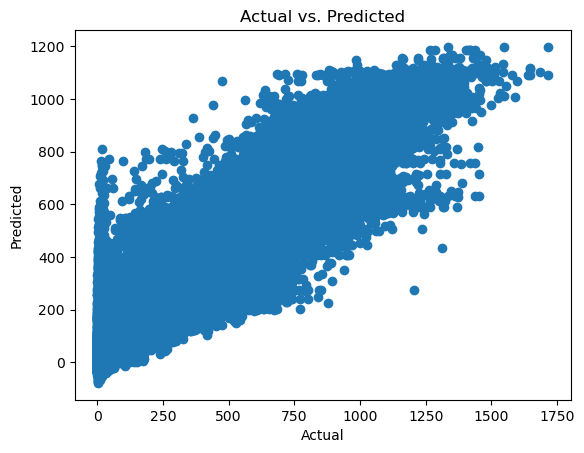

In [17]:
plt.scatter(y_train, xgb_predictions_train)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()


# Evaluate the model using the hold-out (30% examples) test set

In [18]:

# Predicted value for all examples, 
# using the trained model, on in-sample data (same sample used for training and test)
xgb_predictions_test = xgb.predict(X_test).ravel()
y_test_1d = y_test.values.ravel()

df_true_vs_xgb_predicted = pd.DataFrame({'Actual': y_test_1d, 'Predicted': xgb_predictions_test})
df_true_vs_xgb_predicted.head(20)


,Actual,Predicted
0,2,1.335907
1,7,11.114346
2,44,74.117813
3,1,2.343810
4,383,429.194794
5,0,0.627674
6,232,222.369156
7,0,0.609220
8,0,2.889646
9,106,134.449554


In [19]:
# Calculate MAE, MSE and RMSE
test_mae = metrics.mean_absolute_error(df_true_vs_xgb_predicted['Actual'], df_true_vs_xgb_predicted['Predicted'])
test_mse = metrics.mean_squared_error(df_true_vs_xgb_predicted['Actual'], df_true_vs_xgb_predicted['Predicted'])
test_rmse = np.sqrt(mse) # or mse**(0.5) 
print("==================== Test Data =======================")
print('Mean Absolute Error (MAE):', test_mae)
print('Mean Squared Error (MSE):', test_mse)
print('Root Mean Squared Error (RMSE):', test_rmse)

print("==================== Train Data =======================")
print('Mean Absolute Error (MAE):', mae)
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)

==================== Test Data =======================
Mean Absolute Error (MAE): 12.639586373871765
Mean Squared Error (MSE): 1102.7018631316994
Root Mean Squared Error (RMSE): 32.675355690552145
==================== Train Data =======================
Mean Absolute Error (MAE): 12.498460373610314
Mean Squared Error (MSE): 1067.6788695040984
Root Mean Squared Error (RMSE): 32.675355690552145


In [20]:
import pickle

# save the model to disk
filename = 'basic_XGboost_model_2.3.pkl'
pickle.dump(xgb, open(filename, 'wb'))

# convert dataset into DMatrix for XGBoost to check it's better，the outcome shows it's not better.

In [21]:
# import xgboost as xgb

# # convert your dataset into DMatrix for XGBoost
# dtrain = xgb.DMatrix(X_train, label=y_train)
# dtest = xgb.DMatrix(X_test, label=y_test)


In [22]:
# # set xgboost parameters
# param = {
#     'max_depth': 3,  # the maximum depth of each tree
#     'eta': 0.3,  # the training step for each iteration
#     'silent': 1,  # logging mode - quiet
#     'objective': 'reg:linear'}  # regression linear

# num_round = 20  # the number of training iterations

# # train the model
# bst = xgb.train(param, dtrain, num_round)


In [23]:
# # Predicted value for all examples, 
# # using the trained model, on in-sample data (same sample used for training and test)
# xgb_predictions_train = bst.predict(dtrain).ravel()
# y_train_1d = y_train.values.ravel()

# df_true_vs_xgb_predicted = pd.DataFrame({'Actual': y_train_1d, 'Predicted': xgb_predictions_train})
# df_true_vs_xgb_predicted.head(100)

In [24]:
# # Calculate MAE, MSE and RMSE
# mae = metrics.mean_absolute_error(df_true_vs_xgb_predicted['Actual'], df_true_vs_xgb_predicted['Predicted'])
# mse = metrics.mean_squared_error(df_true_vs_xgb_predicted['Actual'], df_true_vs_xgb_predicted['Predicted'])
# rmse = np.sqrt(mse) # or mse**(0.5)  

# print('Mean Absolute Error (MAE):', mae)
# print('Mean Squared Error (MSE):', mse)
# print('Root Mean Squared Error (RMSE):', rmse)

# use lightgbm regression, this model isn't reliable

In [25]:
# from lightgbm import LGBMRegressor


# # instantiate the model

# # lgbm = LGBMRegressor(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=1)
# lgbm = LGBMRegressor(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=1, verbose=-1)

# # record the start time
# start_time = time.time()

# # fit the model
# lgbm.fit(X_train, y_train)

# # calculate and print the time taken
# time_taken = time.time() - start_time
# print(f"Time taken to fit the model: {time_taken} seconds")


In [26]:
# # Predicted value for all examples, 
# # using the trained model, on in-sample data (same sample used for training and test)
# lgbm_predictions_train = lgbm.predict(X_train).ravel()
# y_train_1d = y_train.values.ravel()

# df_true_vs_lgbm_predicted = pd.DataFrame({'Actual': y_train_1d, 'Predicted': lgbm_predictions_train})
# df_true_vs_lgbm_predicted.head(100)


In [27]:
# # Calculate MAE, MSE and RMSE
# train_mae = metrics.mean_absolute_error(df_true_vs_lgbm_predicted['Actual'], df_true_vs_lgbm_predicted['Predicted'])
# train_mse = metrics.mean_squared_error(df_true_vs_lgbm_predicted['Actual'], df_true_vs_lgbm_predicted['Predicted'])
# train_rmse = np.sqrt(mse) # or mse**(0.5)  

# print('Mean Absolute Error (MAE):', train_mae)
# print('Mean Squared Error (MSE):', train_mse)
# print('Root Mean Squared Error (RMSE):', train_rmse)

# try Prophet model, can't run well!!!

In [28]:
# # read in the cleaned csv

# prophet_df = pd.read_csv('train_data_2.2.csv')

# prophet_df

In [29]:
# prophet_df = prophet_df.drop('year_month', axis=1)
# prophet_df = prophet_df.drop('week', axis=1)
# prophet_df = prophet_df.drop('hour', axis=1)
# prophet_df = prophet_df.drop('holiday', axis=1)

# prophet_df

In [30]:
# prophet_df['taxi_zone'] = prophet_df['taxi_zone'].astype('category')
# # prophet_df['year_month'] = prophet_df['year_month'].astype('category')
# # prophet_df['week'] = prophet_df['week'].astype('category')
# # prophet_df['hour'] = prophet_df['hour'].astype('category')
# prophet_df['borough'] = prophet_df['borough'].astype('category')
# # prophet_df['holiday'] = prophet_df['holiday'].astype('category')
# prophet_df['datetime'] = pd.to_datetime(prophet_df['datetime'])
# prophet_df.dtypes

In [31]:
# # set up dummies features
# prophet_df = pd.get_dummies(prophet_df)
# prophet_df.dtypes

In [32]:
# # shuffle the data
# prophet_df = prophet_df.sample(frac=1, random_state=987)
# print(prophet_df.head(5))

In [33]:
# # split data set to training data and test data
# y = pd.DataFrame(prophet_df["passenger_count"])
# X = prophet_df.drop(labels=["passenger_count"], axis=1)

# # divide data into training data and test data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=93)

In [34]:
# # need to reset the index to allow contatenation with predicted values otherwise not joining on same index...
# X_train.reset_index(drop=True, inplace=True)
# y_train.reset_index(drop=True, inplace=True)
# X_test.reset_index(drop=True, inplace=True)
# y_test.reset_index(drop=True, inplace=True)
# X_train.head(5)

In [35]:
# import holidays
# from holidays.countries import UnitedStates
# import fbprophet

# print(holidays.__version__)
# print(fbprophet.__version__)


In [36]:
# import holidays
# from holidays.countries import UnitedStates
# from fbprophet import Prophet


# # Make sure X_train is a DataFrame with 'ds' and 'y' columns
# X_train_df = X_train.rename(columns={'datetime': 'ds', 'passenger_count': 'y'})

# # Instantiate the model
# p_model = Prophet()

# # Add additional regressors
# for col in X_train_df.columns:
#     if col not in ['ds', 'y']:
#         model.add_regressor(col)

# # Record the start time
# start_time = time.time()

# # Fit the model
# p_model.fit(X_train_df)

# # Calculate and print the time taken
# time_taken = time.time() - start_time
# print(f"Time taken to fit the model: {time_taken} seconds")


# try Multi-Layer Perceptron models

In [37]:
from sklearn.neural_network import MLPRegressor

# instantiate the model
mlp = MLPRegressor(random_state=1, max_iter=10)

# record the start time
start_time = time.time()

# fit the model
mlp.fit(X_train, y_train)

# calculate and print the time taken
time_taken = time.time() - start_time
print(f"Time taken to fit the model: {time_taken} seconds")


/Users/lalazhou/opt/anaconda3/envs/research_project/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Time taken to fit the model: 176.27575516700745 seconds


/Users/lalazhou/opt/anaconda3/envs/research_project/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


In [38]:
# Predicted value for all examples, 
# using the trained model, on in-sample data (same sample used for training and test)
mlp_predictions_train = mlp.predict(X_train).ravel()
y_train_1d = y_train.values.ravel()

df_true_vs_mlp_predicted = pd.DataFrame({'Actual': y_train_1d, 'Predicted': mlp_predictions_train})
df_true_vs_mlp_predicted.head(100)


,Actual,Predicted
0,19,37.309402
1,4,9.346290
2,0,2.636037
3,155,268.592631
4,0,1.932002
...,...,...
95,3,8.244745
96,2,6.188105
97,21,17.628371
98,0,-0.198468


In [58]:
# Calculate MAE, MSE and RMSE
mae = metrics.mean_absolute_error(df_true_vs_mlp_predicted['Actual'], df_true_vs_mlp_predicted['Predicted'])
mse = metrics.mean_squared_error(df_true_vs_mlp_predicted['Actual'], df_true_vs_mlp_predicted['Predicted'])
rmse = np.sqrt(mse) # or mse**(0.5)  

print('Mean Absolute Error (MAE):', mae)
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)

Mean Absolute Error (MAE): 10.16841128585435
Mean Squared Error (MSE): 716.6962547519374
Root Mean Squared Error (RMSE): 26.771183290096413


# run pickle

In [40]:
loaded_model = pickle.load(open('basic_XGboost_model_2.3.pkl', 'rb'))
loaded_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=1, ...)

In [41]:
X_test.head(2)

,hotspots,taxi_zone_1,taxi_zone_2,taxi_zone_3,taxi_zone_4,taxi_zone_5,taxi_zone_6,taxi_zone_7,taxi_zone_8,taxi_zone_9,...,holiday_Independence Day,holiday_Labor Day,holiday_Martin Luther King Jr. Day,holiday_Memorial Day,holiday_New Year's Day,holiday_New Year's Day (Observed),holiday_No,holiday_Thanksgiving,holiday_Veterans Day,holiday_Washington's Birthday
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,33,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [42]:
# let's say you have some data in X_test
predictions = loaded_model.predict(X_test)

# print predictions
print(predictions)

[ 1.3359073 11.114346  74.11781   ... 20.44922    6.7800956  4.1973925]


In [43]:
print(X_test.columns)

Index(['hotspots', 'taxi_zone_1', 'taxi_zone_2', 'taxi_zone_3', 'taxi_zone_4',
       'taxi_zone_5', 'taxi_zone_6', 'taxi_zone_7', 'taxi_zone_8',
       'taxi_zone_9',
       ...
       'holiday_Independence Day', 'holiday_Labor Day',
       'holiday_Martin Luther King Jr. Day', 'holiday_Memorial Day',
       'holiday_New Year's Day', 'holiday_New Year's Day (Observed)',
       'holiday_No', 'holiday_Thanksgiving', 'holiday_Veterans Day',
       'holiday_Washington's Birthday'],
      dtype='object', length=328)


# try to run two month data

In [44]:

# # read in the cleaned csv

# predict_df = pd.read_csv('train_data_2.3.csv')

# predict_df

In [45]:
# predict_df.dtypes

In [46]:
# predict_df['taxi_zone'] = predict_df['taxi_zone'].astype('category')
# predict_df['year_month'] = predict_df['year_month'].astype('category')
# predict_df['week'] = predict_df['week'].astype('category')
# predict_df['hour'] = predict_df['hour'].astype('category')
# # predict_df['holiday'] = predict_df['holiday'].astype('category')
# predict_df.dtypes

In [47]:
# # Convert the 'datetime' column to datetime format
# predict_df['datetime'] = pd.to_datetime(predict_df['datetime'])

# # Filter rows based on year and month
# df_2023_jan_feb = predict_df[(predict_df['datetime'].dt.year == 2023) & (predict_df['datetime'].dt.month.isin([1, 2]))]
# df_2023_jan_feb

In [48]:
# df_2023_jan_feb = df_2023_jan_feb.drop('datetime', axis=1)
# df_2023_jan_feb

In [49]:
# # set up dummies features
# df_2023_jan_feb = pd.get_dummies(df_2023_jan_feb)
# df_2023_jan_feb.dtypes

In [50]:
# for col in df_2023_jan_feb.columns:
#     print(col)

In [51]:
# df_2023_jan_feb

In [52]:
# # split data set into the features and target feature
# target_feature = pd.DataFrame(df_2023_jan_feb["passenger_count"])
# features = df_2023_jan_feb.drop(labels=["passenger_count"], axis=1)
# features

In [53]:
# # need to reset the index to allow contatenation with predicted values otherwise not joining on same index...
# target_feature.reset_index(drop=True, inplace=True)
# features.reset_index(drop=True, inplace=True)
# features

In [54]:
# # make predict
# predictions = loaded_model.predict(features)

# # print predictions
# print(predictions)

In [55]:
# # Convert predictions to a DataFrame
# predictions_df = pd.DataFrame(predictions, columns=['predicted_passenger_count'])

# # Reset indices of your target_feature, features DataFrames to align with predictions_df
# target_feature.reset_index(drop=True, inplace=True)
# features.reset_index(drop=True, inplace=True)

# # Concatenate the target_feature, features and predictions dataframes
# result = pd.concat([predictions_df, target_feature, features], axis=1)

# result


In [56]:
# result.to_csv("basic_prediction_two_month_2.csv", index=False)